Imports

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping


# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"



Prepare DATASET

In [2]:

train = ImageDataGenerator(rescale=1/255,validation_split=0.2)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/bilinear/train",
                                          target_size=(32,32),
                                          batch_size = 1,
                                          class_mode = 'binary',subset='training')

validation_dataset = train.flow_from_directory("/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/bilinear/train",
                                          target_size=(32,32),
                                          batch_size = 1,
                                          class_mode = 'binary',subset='validation')                                    
test_dataset = test.flow_from_directory("/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/bilinear/test",
                                          target_size=(32,32),
                                          batch_size =1,
                                          class_mode = 'binary')

test_dataset.class_indices

Found 1280 images belonging to 2 classes.
Found 320 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


{'SNGAN_bilinear_test': 0, 'imagewoof_test': 1}

Design Model

In [3]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))

model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
# model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))

# model.add(keras.layers.MaxPool2D(2,2))

# # Convolutional layer and maxpool layer 3
# model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))

# model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for fake or 1 for real 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))


model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-05-15 01:11:10.376414: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-15 01:11:10.376542: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Training

Usually with every epoch increasing, loss goes lower and accuracy goes higher. But with val_loss and val_acc, many cases can be possible:

val_loss starts increasing, val_acc starts decreasing(means model is cramming values not learning)

val_loss starts increasing, val_acc also increases.(could be case of overfitting or diverse probability values in cases softmax is used in output layer)

val_loss starts decreasing, val_acc starts increasing(Correct, means model build is learning and working fine)

In [4]:
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

history = model.fit(train_dataset,
         steps_per_epoch = 25,
         epochs = 120,
        #  callbacks=[early_stopping],
         validation_data = validation_dataset
         )

Epoch 1/120


2022-05-15 01:11:10.494978: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 7/25 [=======>......................] - ETA: 0s - loss: 2.6832 - accuracy: 0.1429    

2022-05-15 01:11:10.776318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - ETA: 0s - loss: 1.3006 - accuracy: 0.4000

2022-05-15 01:11:11.177882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 46ms/step - loss: 1.3006 - accuracy: 0.4000 - val_loss: 0.6932 - val_accuracy: 0.5063
Epoch 2/120
25/25 [==============================] - 1s 47ms/step - loss: 0.7106 - accuracy: 0.5200 - val_loss: 0.6652 - val_accuracy: 0.5469
Epoch 3/120
25/25 [==============================] - 1s 47ms/step - loss: 0.6542 - accuracy: 0.6400 - val_loss: 0.6368 - val_accuracy: 0.7312
Epoch 4/120
25/25 [==============================] - 1s 47ms/step - loss: 0.5395 - accuracy: 0.8000 - val_loss: 0.5946 - val_accuracy: 0.6875
Epoch 5/120
25/25 [==============================] - 1s 46ms/step - loss: 0.4632 - accuracy: 0.7200 - val_loss: 0.6858 - val_accuracy: 0.6156
Epoch 6/120
25/25 [==============================] - 1s 46ms/step - loss: 0.6373 - accuracy: 0.6400 - val_loss: 0.6316 - val_accuracy: 0.6219
Epoch 7/120
25/25 [==============================] - 1s 49ms/step - loss: 0.7045 - accuracy: 0.5600 - val_loss: 0.5884 - val_accuracy: 0.6250
Epoch 8/120
25/25 

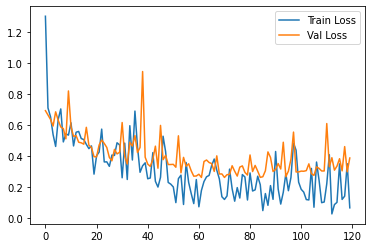

In [5]:
# visualizing losses and accuracy
# print(history.history)
train_loss = history.history['loss']
val_loss   = history.history['val_loss']
train_acc  = history.history['accuracy']
val_acc    = history.history['val_accuracy']
xc         = range(120)

plt.figure()
plt.plot(xc, train_loss,label = 'Train Loss')
plt.plot(xc, val_loss,label = 'Val Loss')
plt.legend(loc='upper right')

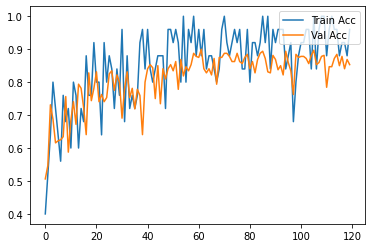

In [6]:
plt.figure()
plt.plot(xc, train_acc,label = 'Train Acc')
plt.plot(xc, val_acc,label = 'Val Acc')
plt.legend(loc='upper right')

In [9]:
_, acc = model.evaluate(test_dataset)
print(acc *100)

400/400 [==============================] - 2s 4ms/step - loss: 0.3905 - accuracy: 0.8500
84.99999642372131


Prediction

In [8]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(32,32))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("Real",fontsize=30)
        
    
    elif val == 0:
        
        plt.xlabel("Fake",fontsize=30)

predictImage(r"/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/test/imagewoof_test/985.jpg")


FileNotFoundError: [Errno 2] No such file or directory: '/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/test/imagewoof_test/985.jpg'

[[1.]]


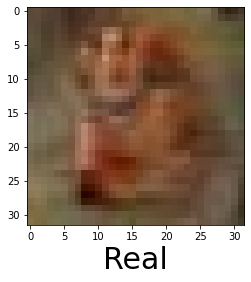

In [ ]:

predictImage(r"/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/test/SNGAN_bicubic_test/954.jpg")